In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Ordinary Differential equation

Consider the following Cauchy problem: find $u:I\rightarrow R$ s.t
$$
\begin{cases}
u^{'}(t) = f(t, u(t)) \\
u(t_0) = u_0
\end{cases}
$$
where $I$ is an interval in $R$ and $f:I\times R \rightarrow R$


## Euler method
### Forward Euler method
This method is obtained considering the above differential eqation and replacing the exact derivative by means of the incremental ratio $u^{'}(x) \approx \frac{u(x+h)-u(x)}{h}$
$$
    u_{n+1} = u_n + hf_n  \;\;\;\;\;\;\;\;\; n=0,\dots,N_h -1
$$

### Backward Euler method
In similar way using the incremental ratio $u^{'}(x) \approx \frac{u(x)-u(x+h)}{h}$ we obtain
$$
    u_{n+1} = u_{n} + hf_{n+1}    \;\;\;\;\;\;\;\;\;  n=0,\dots,N_h -1
$$

## Crank-Nicolson method
Adding togheter the generic steps of the forward and backward Euler method we find
$$
    u_{n+1} = u_{n} + \frac{h}{2} \left(f_n + f_{n+1} \right)    \;\;\;\;\;\;\;\;\; n=0,\dots,N_h -1
$$

## Runge-Kutta methods
A further generalization of the Euler method is the Runge_Kutta method, that involves several evaluations of the function $f(t,y)$ on every interval $[t_n, t_{n+1}]$. In the most general form can be written as
$$
    u_{n+1} = u_{n} + h \sum_{i=1}^s b_iK_i
$$
where
$$
    K_i = f(t_n + c_i h, u_n + h \sum_{j=1}^s b_i K_i) \;\;\;\;\;\;\;\;\; i=1,2,\dots,s
$$
where $A=(a_ij) \in R^{s \times s}$, $\textbf{b} = (b_1,\dots, b_s)^T \in R^{s}$ and $\textbf{c} = (c_1,\dots, c_s)^T \in R^{s}$.
One of the most celebrated Runge-Kutta method reads

$$
    u_{n+1} = u_{n} + \frac{h}{6} (K_1+K_2+K_3+K_4)
$$
where
$$
    K_1 = f_n
$$
$$
    K_2 = f(t_n + \frac{h}{2}, u_n + \frac{h}{2}K_1)
$$
$$
    K_3 = f(t_n + \frac{h}{2}, u_n + \frac{h}{2}K_2) 
$$
$$
    K_4 = f(t_{n+1}, u_n + hK_3)  
$$



# System of ODE
Consider the following system of first order ODE
$$
\begin{cases}
u^{'}_1(t) = f_1(t, u_1(t),\dots,u_m(t)), \\
\vdots \\
u^{'}_m(t) = f_m(t, u_1(t),\dots,u_m(t)) \\
u_1(t_0) = u_{0,1}, \dots, u_m(t_0) = u_{0,m}
\end{cases}
$$
where $t \in (t_0, T]$. 


## Theta method
For it's solution we can apply to each individual equation one of the methods previusly introduced for a scalar problem. For instance the n-th step of the forward Eulero method would read

$$
\begin{cases}
u_{n+1, 1} = u_{n,1} + h f_1(t_n, u_{n,1}, \dots, u_{n,m}), \\
\vdots \\
u_{n+1, m} = u_{n,m} + h f_m(t_n, u_{n,1}, \dots, u_{n,m})
\end{cases}
$$
By writing the system in vector form $\textbf{y}^{'}(t) = \textbf{F}(t, \textbf{y}(t))$ we can extend and generalize the previous developed method to the vector case:
$$
    \textbf{u}_{n+1} = \textbf{u}_{n} + h(\theta \textbf{F}(t_{n+1}, \textbf{u}_{n+1}) + (1-\theta)\textbf{F}(t_n, \textbf{u}_n))
$$
with $0 \leq \theta \leq 1$. This generalization is also called theta method. For $\theta = 0$ is the vector form of the forward Euler method. If $\theta = 1$ is the backward Euler method and for $\theta = 1/2$ is the Crank-Nicolson method.

## Higher order systems

Now consider the case on an ODE of order m

$$
    u^{(m)}(t) = f(t, u, u^{'}, \dots, u^{(m-1)})
$$

whose solution is a family of functions defined up to m arbitrary constant. The latter can be fixed by prescribing m initial conditions
$$
    u(t_0) = u_0, u^{'}(t_0) = u_1, \dots, u^{(m-1)}(t_0) = u_{m-1}
$$

Setting

$$
    w_1(t) = u(t), w_2(t) = u^{'}(t), \dots, w_m(t) = u^{(m-1)}(t)
$$
the above m-order ode can be trasnformed into a first order system of m differential equations

$$
\begin{cases}
    w_1^{'} = w_2, \\
    w_2^{'} = w_3, \\
    \vdots \\
    w_{m-1}^{'} = w_m, \\
    w_{m}^{'} = f(t, w_1, \dots, w_m)
\end{cases}
$$

with initial conditions

$$
 w_1(t_0) = u_0, w_2(t_0) = u_1, \dots, w_m(t_0) = u_{m-1}
$$

Thus we can always approximate the solution of a differential equation of order m by resorting to the equivalent system of m first order eqautions, and then applying to this system a convenient discretization method.


## Armonic motion
This is the model under pendulum with small angle, Hook's law, etc.
Force is proportional to the displacement:

$$
\begin{cases}
  m \frac{d^2x}{dt^2} = -kx \\
  x(0) = x_0 \\
  x^{'}(0) = x^{'}(0) \\
\end{cases}
$$
Analytical solution

$$
  x(t) = Acos(\omega t) + Bsin(\omega t),  \;\;\;\; \omega^2 = \frac{k}{m} \\
  x_0 = A \\
  x^{'} = \omega B
$$

In [84]:
A = 0.5
B = 0.5
k = 1
m = 1
omega = np.sqrt(k/m)

In [18]:
def u(t):
    return A*np.cos(omega*t) + B*np.sin(omega*t)

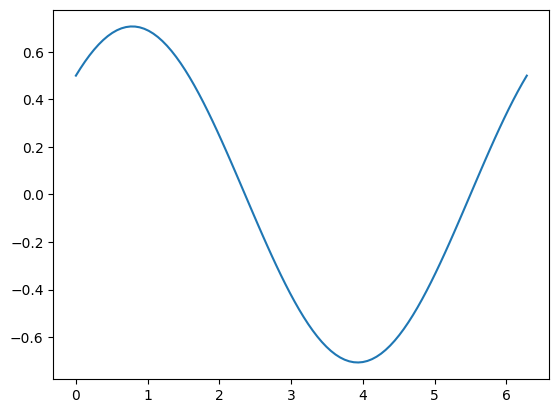

In [88]:
t = np.linspace(0,2*np.pi, 100)
plt.plot(t, u(t))

### Numerical solution: Euler's method
This is a second order differential equaton. Thus we replace it with two first order dfferential equation:
$$
\begin{cases}
    \frac{dx}{dt} = v \\
    \frac{dv}{dt} = - \frac{k}{m}x
\end{cases}
$$

Apply the euler method:

$$
    x_{n+1} = x_n + v_n*h  \\
    v_{n+1} = v_n - \frac{k}{m}x_{n}*h  

$$

where $h = \Delta t$ to make the notation more clear in this setting. Choose time step small compared to the period, $\Delta t \ll 2\pi/\omega$


In [85]:
def euler_integrator(T, h):
    
    x = np.zeros(T)
    v = np.zeros(T)

    x[0] = A
    v[0] = omega*B

    for t in np.arange(T-1):
        x[t+1] = x[t] + v[t]*h
        v[t+1] = v[t] - k/m*x[t]*h
    
    return x
    

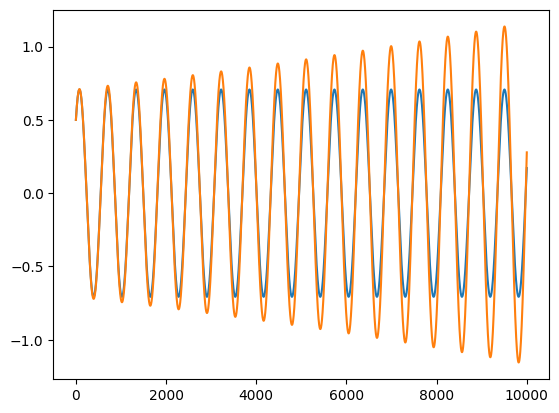

In [86]:
T = 10000
h = 0.01
x = euler_integrator(T, h)

plt.plot(np.arange(T), u(np.arange(0, (T) * h, h)))
plt.plot(np.arange(T), x)

In the plot below we can notice thet the amplitude of the oscillation increases over time, and, in accordance with this finding, the energy must also increase. Both are in striking contradiction to the analytical solution. It is worth stressing at this point that this non-conservation of energy can be reduced by minimising the time step h. This energy non-conservation will, however, show up in any case - the pendulum just has to run long enough. So, apparently, for oscillatory motion, the Euler method does not respect the conservation of energy that you would expect from a frictionless motion